In [ ]:
import pandas as pd
data = pd.read_csv("/content/Train_Data_USA copy.csv")


# Display the first 5 rows in a table format
import IPython.display as display
display.display(data.head(5))

<ipython-input-1-5ba0eee273ce>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/Train_Data_USA copy.csv")


,Incident City,Incident State,Date Of Incident,Incident Time,Quantity Released,Commodity Long Name,Hazardous Class,Total Hazmat Fatalities,Total Damages,Shipper Name,Mode Of Transportation,Cont1 Packaging Type,Cont1 Package Capacity,What Failed,How Failed,Causes of Failure,Incident Result
0,GLEN BURNIE,MD,17/04/2000,1530,0.25000,"CORROSIVE LIQUID, ACIDIC, INORGANIC, N.O.S.",8,0,180,BEVERAGE RESEARCH CENTER INC,Highway,NaN,0.5,NaN,Punctured,NaN,Spillage
1,CHESTER,VA,24/07/2013,1200,30.00000,PAINT RELATED MATERIAL INCLUDING PAINT THINNIN...,3,0,0,CCI,Highway,Drum,55.0,Basic Material,Crushed,Inadequate Blocking and Bracing,Spillage
2,HOUSTON,TX,01/09/2000,NaN,2.00000,"OXIDIZING SOLID, N.O.S.",5.1,0,150,NALCO CHEMICAL CO,Highway,NaN,2400.0,Auxiliary Valve; Piping or Fittings,NaN,Defective Component or Device,Spillage
3,DALLAS,TX,28/07/2021,712,0.09375,"SODIUM HYDROXIDE, SOLUTION",8,0,0,OFFICE DEPOT 1079,Highway,Box,0.0,"Closure (e.g., Cap, Top, or Plug)",Leaked,Improper Preparation for Transportation,Spillage
4,NASHVILLE,TN,20/06/2019,400,0.12500,"FLAMMABLE LIQUIDS, CORROSIVE, N.O.S.",3,0,0,PPG INDUSTRIES INC,Highway,Box,0.0,"Closure (e.g., Cap, Top, or Plug)",Leaked,"Loose Closure, Component, or Device",Spillage


DATA CLEANING

In [ ]:
# Fill missing 'What Failed' based on 'Causes of Failure'
data['What Failed'] = data['What Failed'].fillna(data['Causes of Failure'])

# Fill missing 'Causes of Failure' based on 'What Failed'
data['Causes of Failure'] = data['Causes of Failure'].fillna(data['What Failed'])

# Fill missing 'How Failed' based on the most frequent value for consistency
data['How Failed'] = data['How Failed'].fillna(data['How Failed'].mode()[0])

# Other categorical variables
data['Incident City'] = data['Incident City'].fillna('Unknown')
data['Commodity Long Name'] = data['Commodity Long Name'].fillna('Unknown')

In [ ]:
# Fill missing values for numerical columns
data['Quantity Released'] = data['Quantity Released'].fillna(data['Quantity Released'].mean())
data['Cont1 Package Capacity'] = data['Cont1 Package Capacity'].fillna(data['Cont1 Package Capacity'].median())

Removing Duplicates

In [ ]:
# Check and remove duplicates
duplicates_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

# Drop duplicate rows
data.drop_duplicates(inplace=True)
print(f"Shape after removing duplicates: {data.shape}")

Number of duplicate rows: 107
Shape after removing duplicates: (99893, 17)


DESCRIPTIVE STATISTICS

In [ ]:
# Extract numerical columns from the dataset
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Check the numerical columns present in the dataset
numerical_columns = numerical_data.columns.tolist()
print("Numerical Variables:", numerical_columns)

# Compute descriptive statistics for numerical variables
descriptive_stats = numerical_data.describe().T

# Add variance to the descriptive statistics
descriptive_stats['variance'] = numerical_data.var()

# Rename columns for clarity
descriptive_stats.rename(columns={
    'mean': 'Mean',
    'std': 'Standard Deviation',
    'min': 'Minimum',
    '25%': '25th Percentile',
    '50%': 'Median',
    '75%': '75th Percentile',
    'max': 'Maximum'
}, inplace=True)

# Display the descriptive statistics table
from IPython.display import display
display(descriptive_stats.style.format(precision=2).set_caption("Descriptive Statistics"))

Numerical Variables: ['Quantity Released', 'Total Hazmat Fatalities', 'Total Damages', 'Cont1 Package Capacity']


,count,Mean,Standard Deviation,Minimum,25th Percentile,Median,75th Percentile,Maximum,variance
Quantity Released,99893.00,386.18,92172.03,0.00,0.06,0.47,2.00,29120000.00,8495683653.80
Total Hazmat Fatalities,99893.00,0.00,0.03,0.00,0.00,0.00,0.00,4.00,0.00
Total Damages,99893.00,6699.72,163508.73,0.00,0.00,0.00,0.00,14400426.00,26735105867.80
Cont1 Package Capacity,99893.00,1534.90,95415.62,0.00,0.00,4.00,10.00,30000000.00,9104140106.24


Goodness of fit test

In [ ]:
from scipy.stats import chi2_contingency

# Example: Testing 'Mode Of Transportation' distribution
transport_counts = data['Mode Of Transportation'].value_counts()
expected = [1/len(transport_counts)] * len(transport_counts)  # Uniform expected distribution

chi2, p, dof, expected_counts = chi2_contingency([transport_counts, expected])
print(f"Chi-square statistic of Mode Of Transportation: {chi2}, p-value: {p}, Degrees of freedom: {dof}")

from scipy.stats import chi2_contingency


transport_counts = data['Incident Result'].value_counts()
expected = [1/len(transport_counts)] * len(transport_counts)  # Uniform expected distribution

chi2, p, dof, expected_counts = chi2_contingency([transport_counts, expected])
print(f"Chi-square statistic of Incident Result: {chi2}, p-value: {p}, Degrees of freedom: {dof}")

transport_counts = data['Incident City'].value_counts()
expected = [1/len(transport_counts)] * len(transport_counts)  # Uniform expected distribution

chi2, p, dof, expected_counts = chi2_contingency([transport_counts, expected])
print(f"Chi-square statistic of Incident City : {chi2}, p-value: {p}, Degrees of freedom: {dof}")

transport_counts = data['Incident State'].value_counts()
expected = [1/len(transport_counts)] * len(transport_counts)  # Uniform expected distribution

chi2, p, dof, expected_counts = chi2_contingency([transport_counts, expected])
print(f"Chi-square statistic of Incident State: {chi2}, p-value: {p}, Degrees of freedom: {dof}")

transport_counts = data['Commodity Long Name'].value_counts()
expected = [1/len(transport_counts)] * len(transport_counts)  # Uniform expected distribution

chi2, p, dof, expected_counts = chi2_contingency([transport_counts, expected])
print(f"Chi-square statistic of Commodity Long Name: {chi2}, p-value: {p}, Degrees of freedom: {dof}")

transport_counts = data['Shipper Name'].value_counts()
expected = [1/len(transport_counts)] * len(transport_counts)  # Uniform expected distribution

chi2, p, dof, expected_counts = chi2_contingency([transport_counts, expected])
print(f"Chi-square statistic of Shipper Name : {chi2}, p-value: {p}, Degrees of freedom: {dof}")

transport_counts = data['Causes of Failure'].value_counts()
expected = [1/len(transport_counts)] * len(transport_counts)  # Uniform expected distribution

chi2, p, dof, expected_counts = chi2_contingency([transport_counts, expected])
print(f"Chi-square statistic of Causes of Failure : {chi2}, p-value: {p}, Degrees of freedom: {dof}")

transport_counts = data['Cont1 Packaging Type'].value_counts()
expected = [1/len(transport_counts)] * len(transport_counts)  # Uniform expected distribution

chi2, p, dof, expected_counts = chi2_contingency([transport_counts, expected])
print(f"Chi-square statistic of Cont1 Packaging Type: {chi2}, p-value: {p}, Degrees of freedom: {dof}")

Chi-square statistic of Mode Of Transportation: 31.020794514261176, p-value: 8.415211472664772e-07, Degrees of freedom: 3
Chi-square statistic of Incident Result: 643.7999331534734, p-value: 1.5262132675323093e-107, Degrees of freedom: 44
Chi-square statistic of Incident City : 7.99882373024737, p-value: 1.0, Degrees of freedom: 6708
Chi-square statistic of Incident State: 109.1318947070407, p-value: 1.938140301675592e-05, Degrees of freedom: 55
Chi-square statistic of Commodity Long Name: 33.780858158378216, p-value: 1.0, Degrees of freedom: 1216
Chi-square statistic of Shipper Name : 1.1133492756987065, p-value: 1.0, Degrees of freedom: 38856
Chi-square statistic of Causes of Failure : 78.43917340176246, p-value: 1.0, Degrees of freedom: 629
Chi-square statistic of Cont1 Packaging Type: 46.89050232736319, p-value: 5.863345946037774e-08, Degrees of freedom: 7


In [ ]:
# Define the variables to test
variables = ["Mode Of Transportation", "Incident Result", "How Failed"]

# Store results for each test
results = []


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming your data is in a DataFrame named 'data'
contingency_table = pd.crosstab(data['Causes of Failure'], data['What Failed'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)


# Print the contingency table
print(contingency_table)

# Visualize the contingency table using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Contingency Table: Cause of Failure vs. What Failed')
plt.xlabel('What Failed')
plt.ylabel('Cause of Failure')
plt.show()

# Interpret the results
if p < 0.05:
    print("There is a significant association between 'Cause of Failure' and 'What Failed'.")
else:
    print("There is no significant association between 'Cause of Failure' and 'What Failed'.")

Chi-square statistic: 12228597.582142873
p-value: 0.0
Degrees of freedom: 335257
What Failed                                         Abrasion  \
Causes of Failure                                              
Abraded                                                    0   
Abrasion                                                   7   
Abrasion; Abrasion                                         0   
Abrasion; Corrosion - Exterior; Improper Prepar...         0   
Abrasion; Dropped; Dropped                                 0   
...                                                      ...   
Water Damage; Loose Closure, Component, or Devi...         0   
Water Damage; Overfilled                                   0   
Water Damage; Vehicular Crash or Accident Damage           0   
Water Damage; Water Damage                                 0   
Weld or Seam                                               0   

What Failed                                         Abrasion; Abrasion  \
Causes of Fa

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/backend_bases.py", line 2187, in print_figure
    result = print_method(
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/backend_bases.py", line 2043, in <lambda>
    print_method = functools.wraps(meth)(lambda *args, **kwargs: meth(
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/backends/backend_agg.py", line 497, in print_png
    self._print_pil(filename_or_obj, "png", pil_kwargs, metadata)
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/backends/backend_agg.py", line 445, in _print_pil
    FigureCanvasAgg.draw(self)
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/backends/backend_agg.py", line 388, in draw
    self.figure.draw(self.renderer)
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/artist.py", line 95, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/

TypeError: object of type 'NoneType' has no len()

Data Visualization

Years

<ipython-input-7-4b4a088dc03f>:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date Of Incident'] = pd.to_datetime(data['Date Of Incident'], errors='coerce')


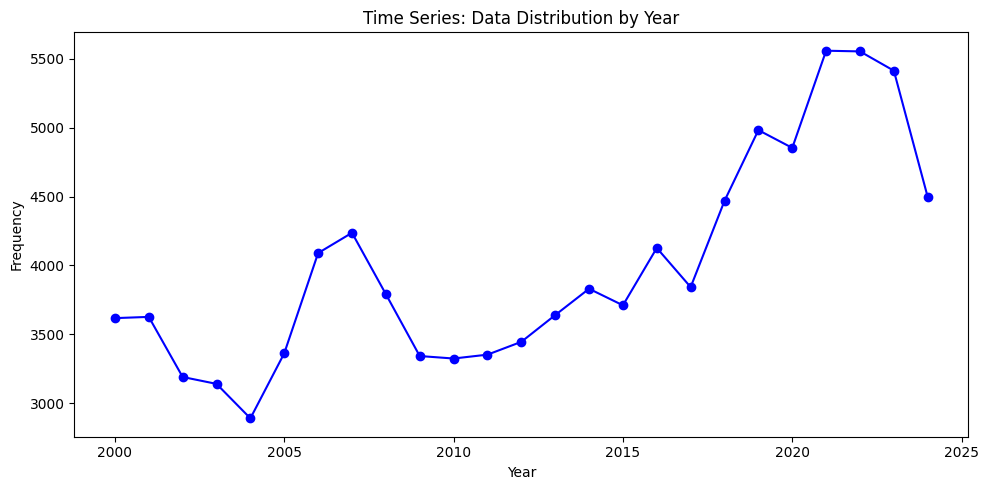

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
# Convert 'Date' column to datetime format
data['Date Of Incident'] = pd.to_datetime(data['Date Of Incident'], errors='coerce')

# Extract year from the 'Date' column
data['Year'] = data['Date Of Incident'].dt.year

# Group data by year and count occurrences
yearly_data = data['Year'].value_counts().sort_index()

# Plotting the yearly time series
plt.figure(figsize=(10, 5))
plt.plot(yearly_data.index, yearly_data.values, marker='o', linestyle='-', color='blue')
plt.title("Time Series: Data Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Months

In [ ]:
ns

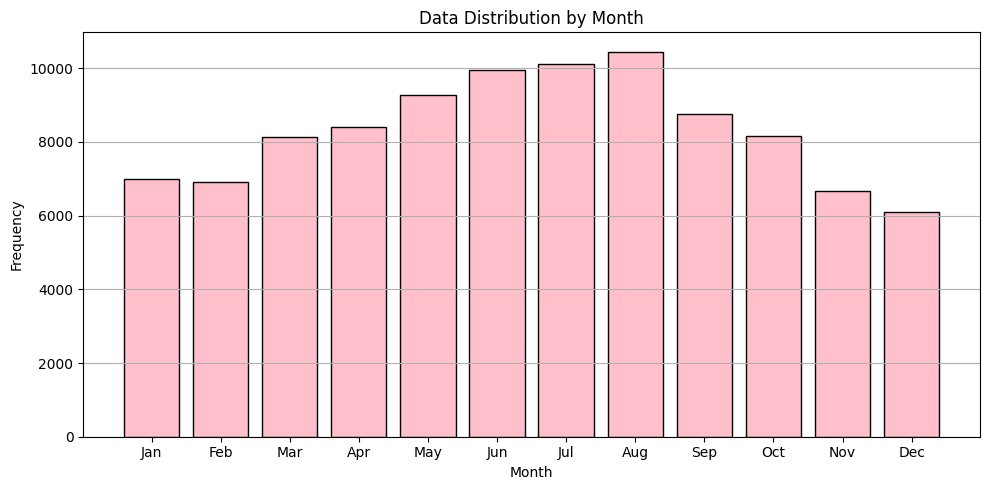

In [ ]:
# Extract month from the 'Date' column
data['Month'] = data['Date Of Incident'].dt.month

# Group data by month and count occurrences
monthly_data = data['Month'].value_counts().sort_index()

# Plotting the monthly time series
plt.figure(figsize=(10,5))
plt.bar(monthly_data.index, monthly_data.values, color='pink', edgecolor='black')
plt.title("Data Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.xticks(range(1, 13),
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

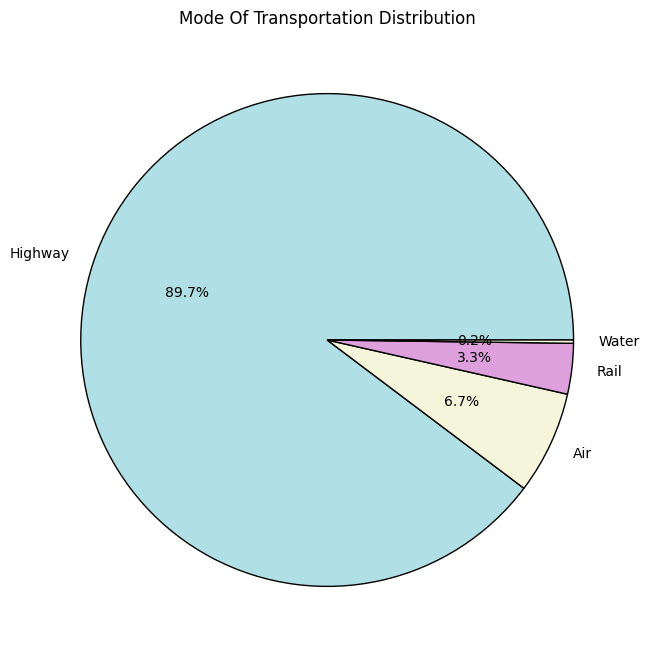

In [ ]:

mode_of_transportation_counts = data['Mode Of Transportation'].value_counts()

# Plotting pie chart
plt.figure(figsize=(15, 8))
mode_of_transportation_counts.plot(kind='pie', autopct='%1.1f%%', colors=['powderblue', 'beige', 'plum', 'beige', 'chocolate'], wedgeprops={'edgecolor': 'black'})
plt.title('Mode Of Transportation Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()

States

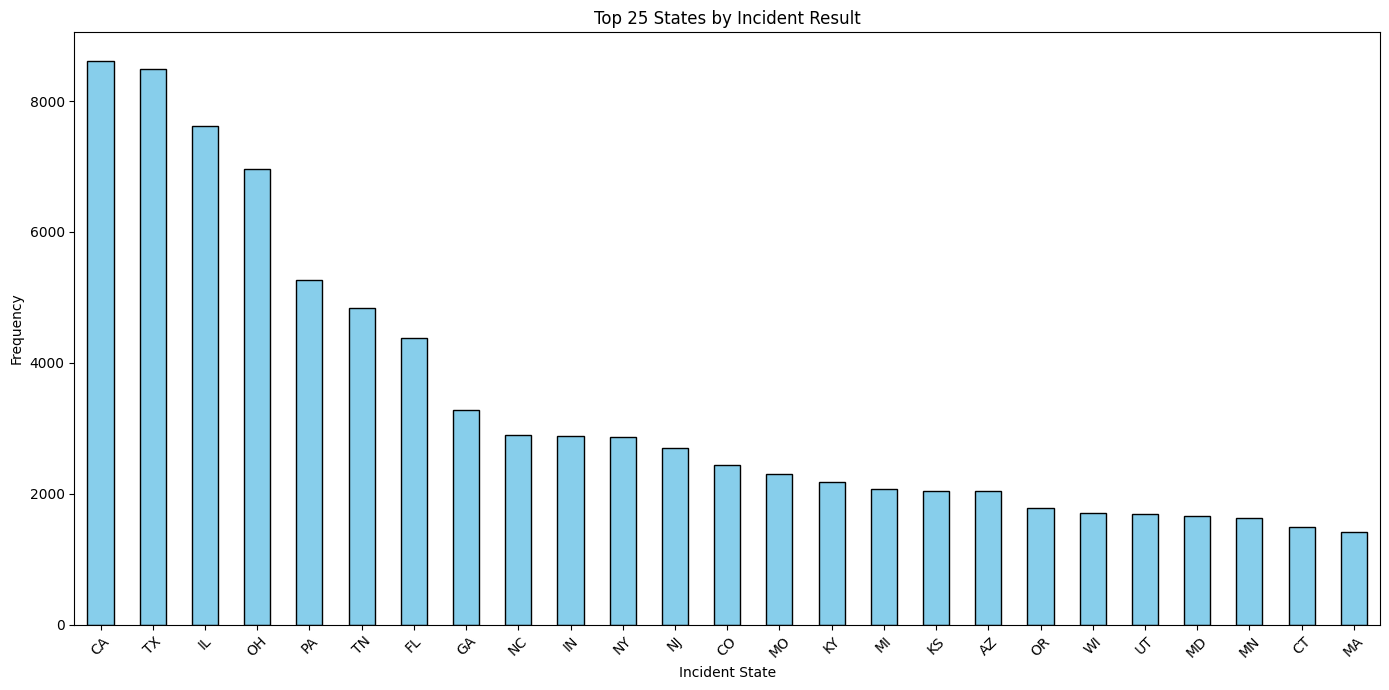

In [ ]:
# Assuming 'data' is your DataFrame and 'Incident State' is the column name
incident_result_counts = data['Incident State'].value_counts().head(25)

# Plotting the bar chart
plt.figure(figsize=(14, 7))
incident_result_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 25 States by Incident Result')
plt.xlabel('Incident State')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotates x-axis labels for readability
plt.tight_layout()
plt.show()

Cities

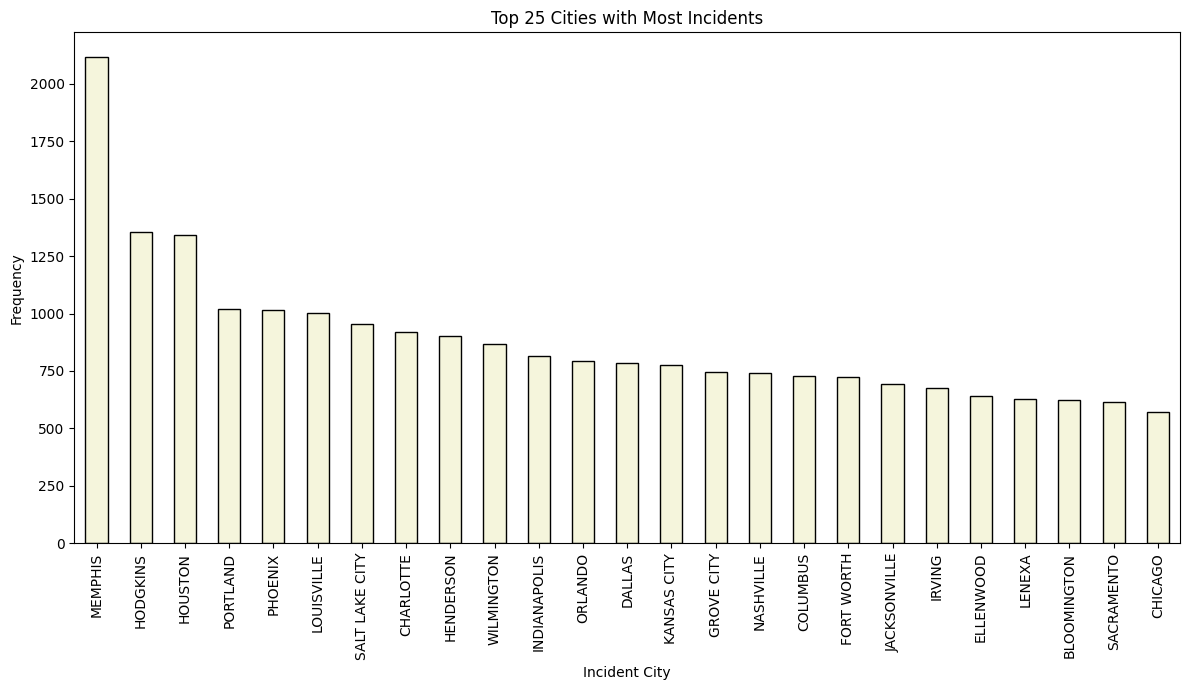

In [ ]:
# Select the top 30 cities with the most occurrences
top_30_cities = data['Incident City'].value_counts().head(25)

# Plotting the bar chart for the top 30 cities
plt.figure(figsize=(12, 7))
top_30_cities.plot(kind='bar', color='beige', edgecolor='black')
plt.title('Top 25 Cities with Most Incidents')
plt.xlabel('Incident City')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotates x-axis labels for better readability
plt.tight_layout()
plt.show()

How Failed

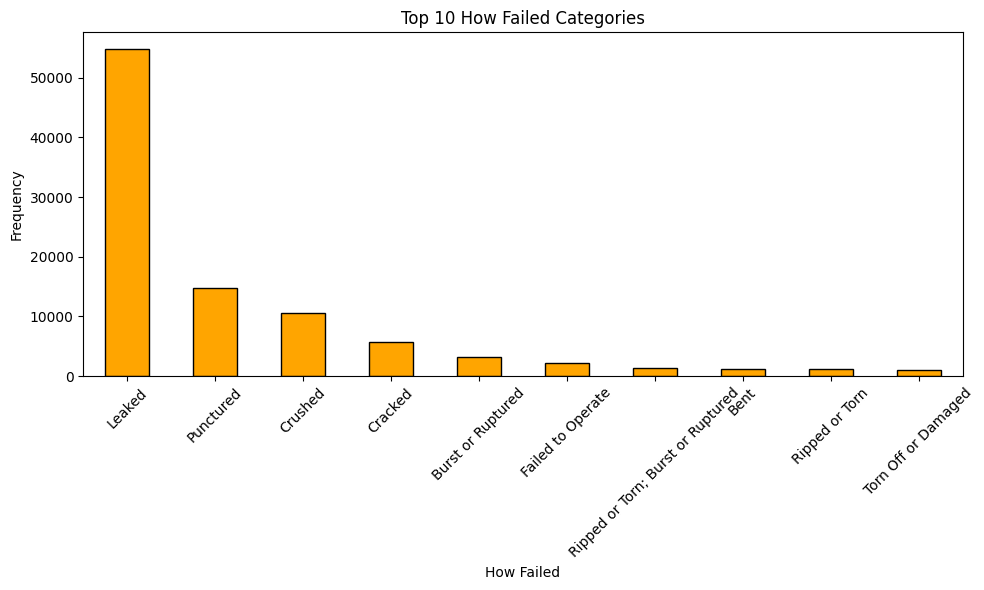

In [ ]:
# Get the top 10 most common values in the 'How Failed' column
top_10_how_failed = data['How Failed'].value_counts().head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_10_how_failed.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 How Failed Categories')
plt.xlabel('How Failed')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.tight_layout()
plt.show()

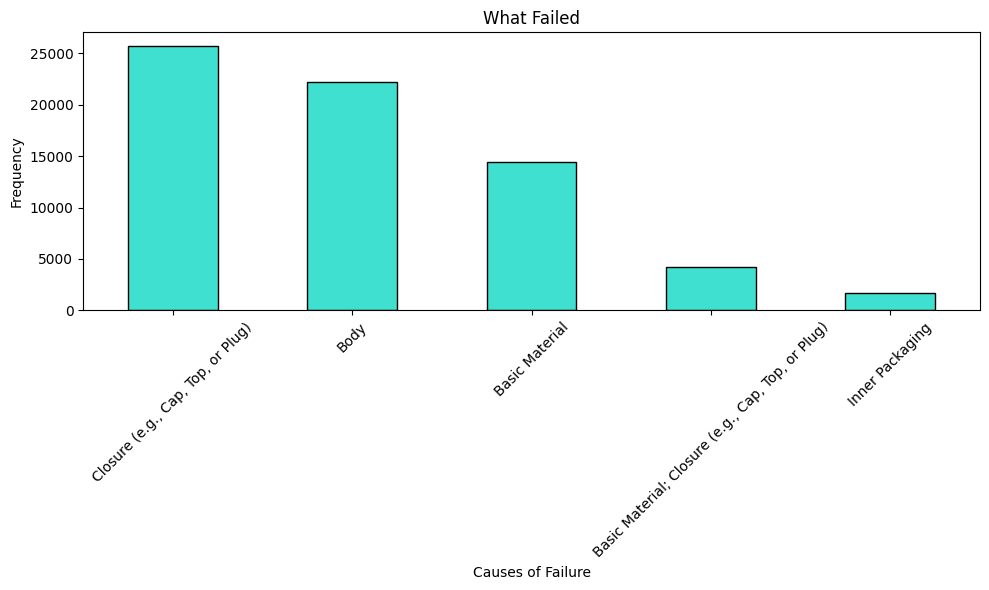

In [ ]:
# Get the top 10 most common values in the 'Incident Result' column
import matplotlib.pyplot as plt

# Get the top 10 most common values in the 'Causes of Failure' column
top_10_causes_of_failure = data['What Failed'].value_counts().head(5)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_10_causes_of_failure.plot(kind='bar', color='turquoise', edgecolor='black')
plt.title('What Failed')
plt.xlabel('Causes of Failure')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()
plt.show()

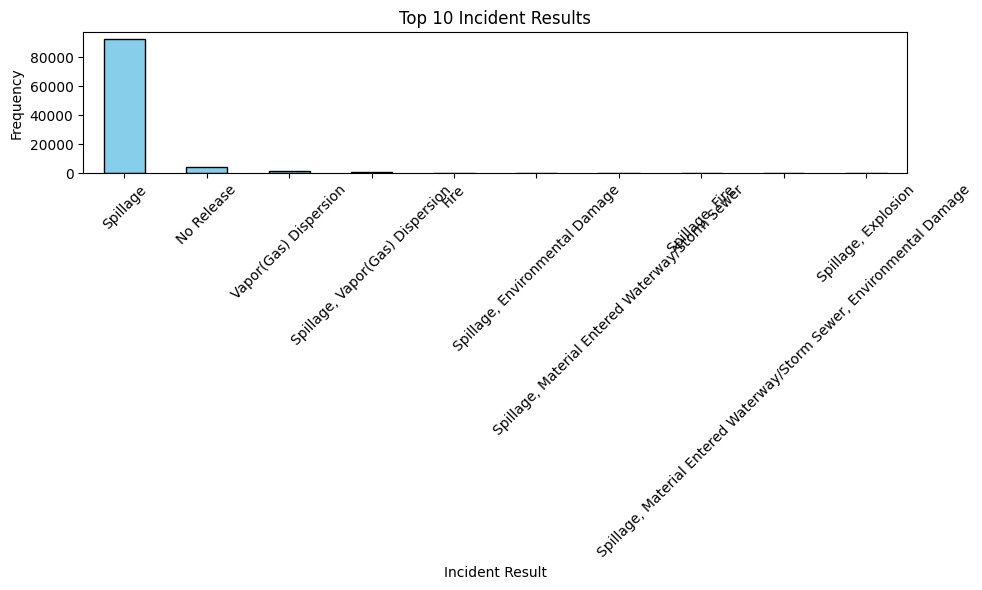

In [ ]:
# prompt: plot for incident top 10 result

# Get the top 10 most common values in the 'Incident Result' column
top_10_incident_result = data['Incident Result'].value_counts().head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_10_incident_result.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Incident Results')
plt.xlabel('Incident Result')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()
plt.show()

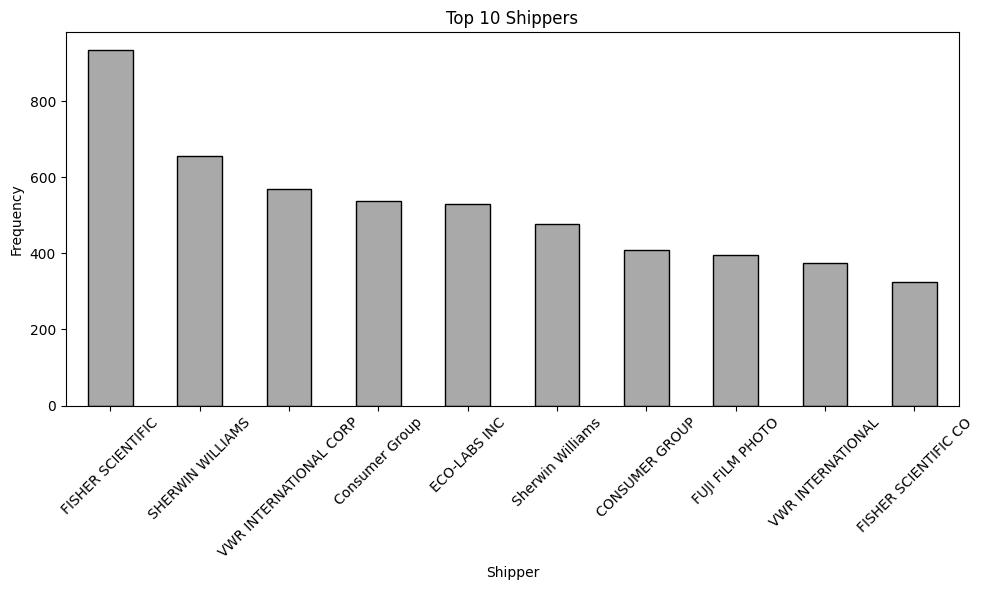

In [ ]:
# prompt: Plot the top 10 shippers

# Assuming 'data' DataFrame is already loaded and processed as in the provided code.

# Get the top 10 shippers
top_10_shippers = data['Shipper Name'].value_counts().head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_10_shippers.plot(kind='bar', color='darkgrey', edgecolor='black')
plt.title('Top 10 Shippers')
plt.xlabel('Shipper')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()
plt.show()

FEATURES ENGINEERING

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Specify the target variable
target_column = "What Failed"  # Replace with your target variable name
X = data.drop(columns=[target_column])
y = data[target_column]

# Handle mixed-type columns
for col in X.columns:
    if X[col].apply(type).nunique() > 1:  # Mixed types found
        print(f"Column '{col}' has mixed types. Converting to string...")
        X[col] = X[col].astype(str)

# Handle missing values
num_features = X.select_dtypes(include=['float64', 'int64']).columns
cat_features = X.select_dtypes(include=['object']).columns

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

X[num_features] = num_imputer.fit_transform(X[num_features])
X[cat_features] = cat_imputer.fit_transform(X[cat_features])

# Encode categorical features
label_encoders = {}
for col in cat_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))  # Ensure uniform string type
    label_encoders[col] = le

# Encode the target variable if it's categorical
if y.dtypes == 'object':
    y = LabelEncoder().fit_transform(y)

# Perform F-Test for numerical features
f_test_selector = SelectKBest(score_func=f_regression, k='all')
f_test_selector.fit(X[num_features], y)
f_test_scores = pd.Series(f_test_selector.scores_, index=num_features).sort_values(ascending=False)

# Perform Chi-Squared Test for categorical features
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X[cat_features], y)
chi2_scores = pd.Series(chi2_selector.scores_, index=cat_features).sort_values(ascending=False)

# Combine and display results
print("\n=== F-Test Scores for Numerical Features ===")
print(f_test_scores)

print("\n=== Chi-Squared Scores for Categorical Features ===")
print(chi2_scores)

# Combine the top features
top_num_features = f_test_scores.head(5).index.tolist()  # Top 5 numerical features
top_cat_features = chi2_scores.head(5).index.tolist()  # Top 5 categorical features

print("\n=== Most Important Features ===")
most_important_features = top_num_features + top_cat_features
print(most_important_features)




Column 'Incident City' has mixed types. Converting to string...
Column 'Incident State' has mixed types. Converting to string...
Column 'Incident Time' has mixed types. Converting to string...
Column 'Commodity Long Name' has mixed types. Converting to string...
Column 'Hazardous Class' has mixed types. Converting to string...
Column 'Shipper Name' has mixed types. Converting to string...
Column 'Cont1 Packaging Type' has mixed types. Converting to string...
Column 'How Failed' has mixed types. Converting to string...
Column 'Causes of Failure' has mixed types. Converting to string...
Column 'Incident Result' has mixed types. Converting to string...

=== F-Test Scores for Numerical Features ===
Total Hazmat Fatalities    51.663777
Total Damages              36.856699
Cont1 Package Capacity     16.245182
Quantity Released           3.804010
dtype: float64

=== Chi-Squared Scores for Categorical Features ===
Shipper Name              4.488041e+06
Causes of Failure         3.487339e+06
Ho

In [ ]:
print("Selected Numerical Features (F-Test):", selected_num_features)
print("Selected Categorical Features (Chi-Squared):", selected_cat_features)

Selected Numerical Features (F-Test): Index(['Quantity Released', 'Total Hazmat Fatalities',
       'Cont1 Package Capacity'],
      dtype='object')
Selected Categorical Features (Chi-Squared): Index(['Incident City', 'Incident Time', 'Shipper Name', 'What Failed',
       'Causes of Failure'],
      dtype='object')


In [ ]:
# Convert 'Hazardous Class' to string to allow extraction
data['Hazardous Class'] = data['Hazardous Class'].astype(str)

# Extract the numeric part of 'Hazardous Class' and convert to float
data['Hazardous Class'] = data['Hazardous Class'].str.extract('(\d+\.?\d*)').astype(float)

# Check for any NaN values after extraction
print("NaN values after extraction:", data['Hazardous Class'].isna().sum())

# Fill NaN values with the mean of the 'Hazardous Class' column
data['Hazardous Class'].fillna(data['Hazardous Class'].mean(), inplace=True)

NaN values after extraction: 0


<ipython-input-121-2a54e9dfcc00>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Hazardous Class'].fillna(data['Hazardous Class'].mean(), inplace=True)


CORRELATION FOR RELATIONSHIPS

<ipython-input-152-eaaa4a752824>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].fillna('Unknown'))  # Handle missing values by filling with 'Unknown'
<ipython-input-152-eaaa4a752824>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].fillna('Unknown'))  # Handle missing values by filling with 'Unknown'
<ipython-input-152-eaaa4a752824>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

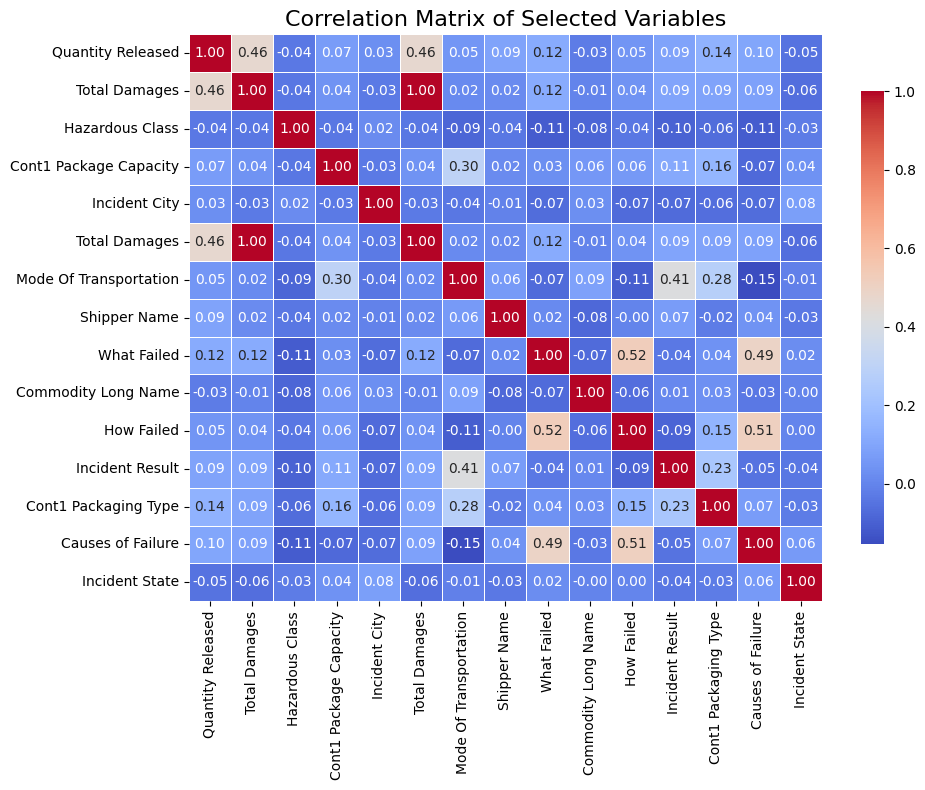

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Selected features for correlation matrix
selected_features = ['Quantity Released', 'Total Damages', 'Hazardous Class',
                     'Cont1 Package Capacity', 'Incident City', 'Total Damages', 'Mode Of Transportation',
                     'Shipper Name', 'What Failed', 'Commodity Long Name', 'How Failed', 'Incident Result', 'Cont1 Packaging Type', 'Causes of Failure', 'Incident State']

# Filter dataset to include selected features
X = data[selected_features]

# Define categorical features
cat_features = ['Incident City', 'Shipper Name', 'What Failed', 'Commodity Long Name', 'How Failed', 'Incident Result', 'Mode Of Transportation', 'Cont1 Packaging Type', 'Causes of Failure', 'Incident State']

# Encode categorical variables
label_encoders = {}
for col in cat_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].fillna('Unknown'))  # Handle missing values by filling with 'Unknown'
    label_encoders[col] = le

# Now, all features (both categorical and numerical) are numeric and can be included in the correlation matrix
corr_matrix = X.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Selected Variables', fontsize=16)
plt.tight_layout()
plt.show()

<ipython-input-151-ab9755efe8db>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].fillna('Unknown'))  # Handle missing values by filling with 'Unknown'
<ipython-input-151-ab9755efe8db>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].fillna('Unknown'))  # Handle missing values by filling with 'Unknown'
<ipython-input-151-ab9755efe8db>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

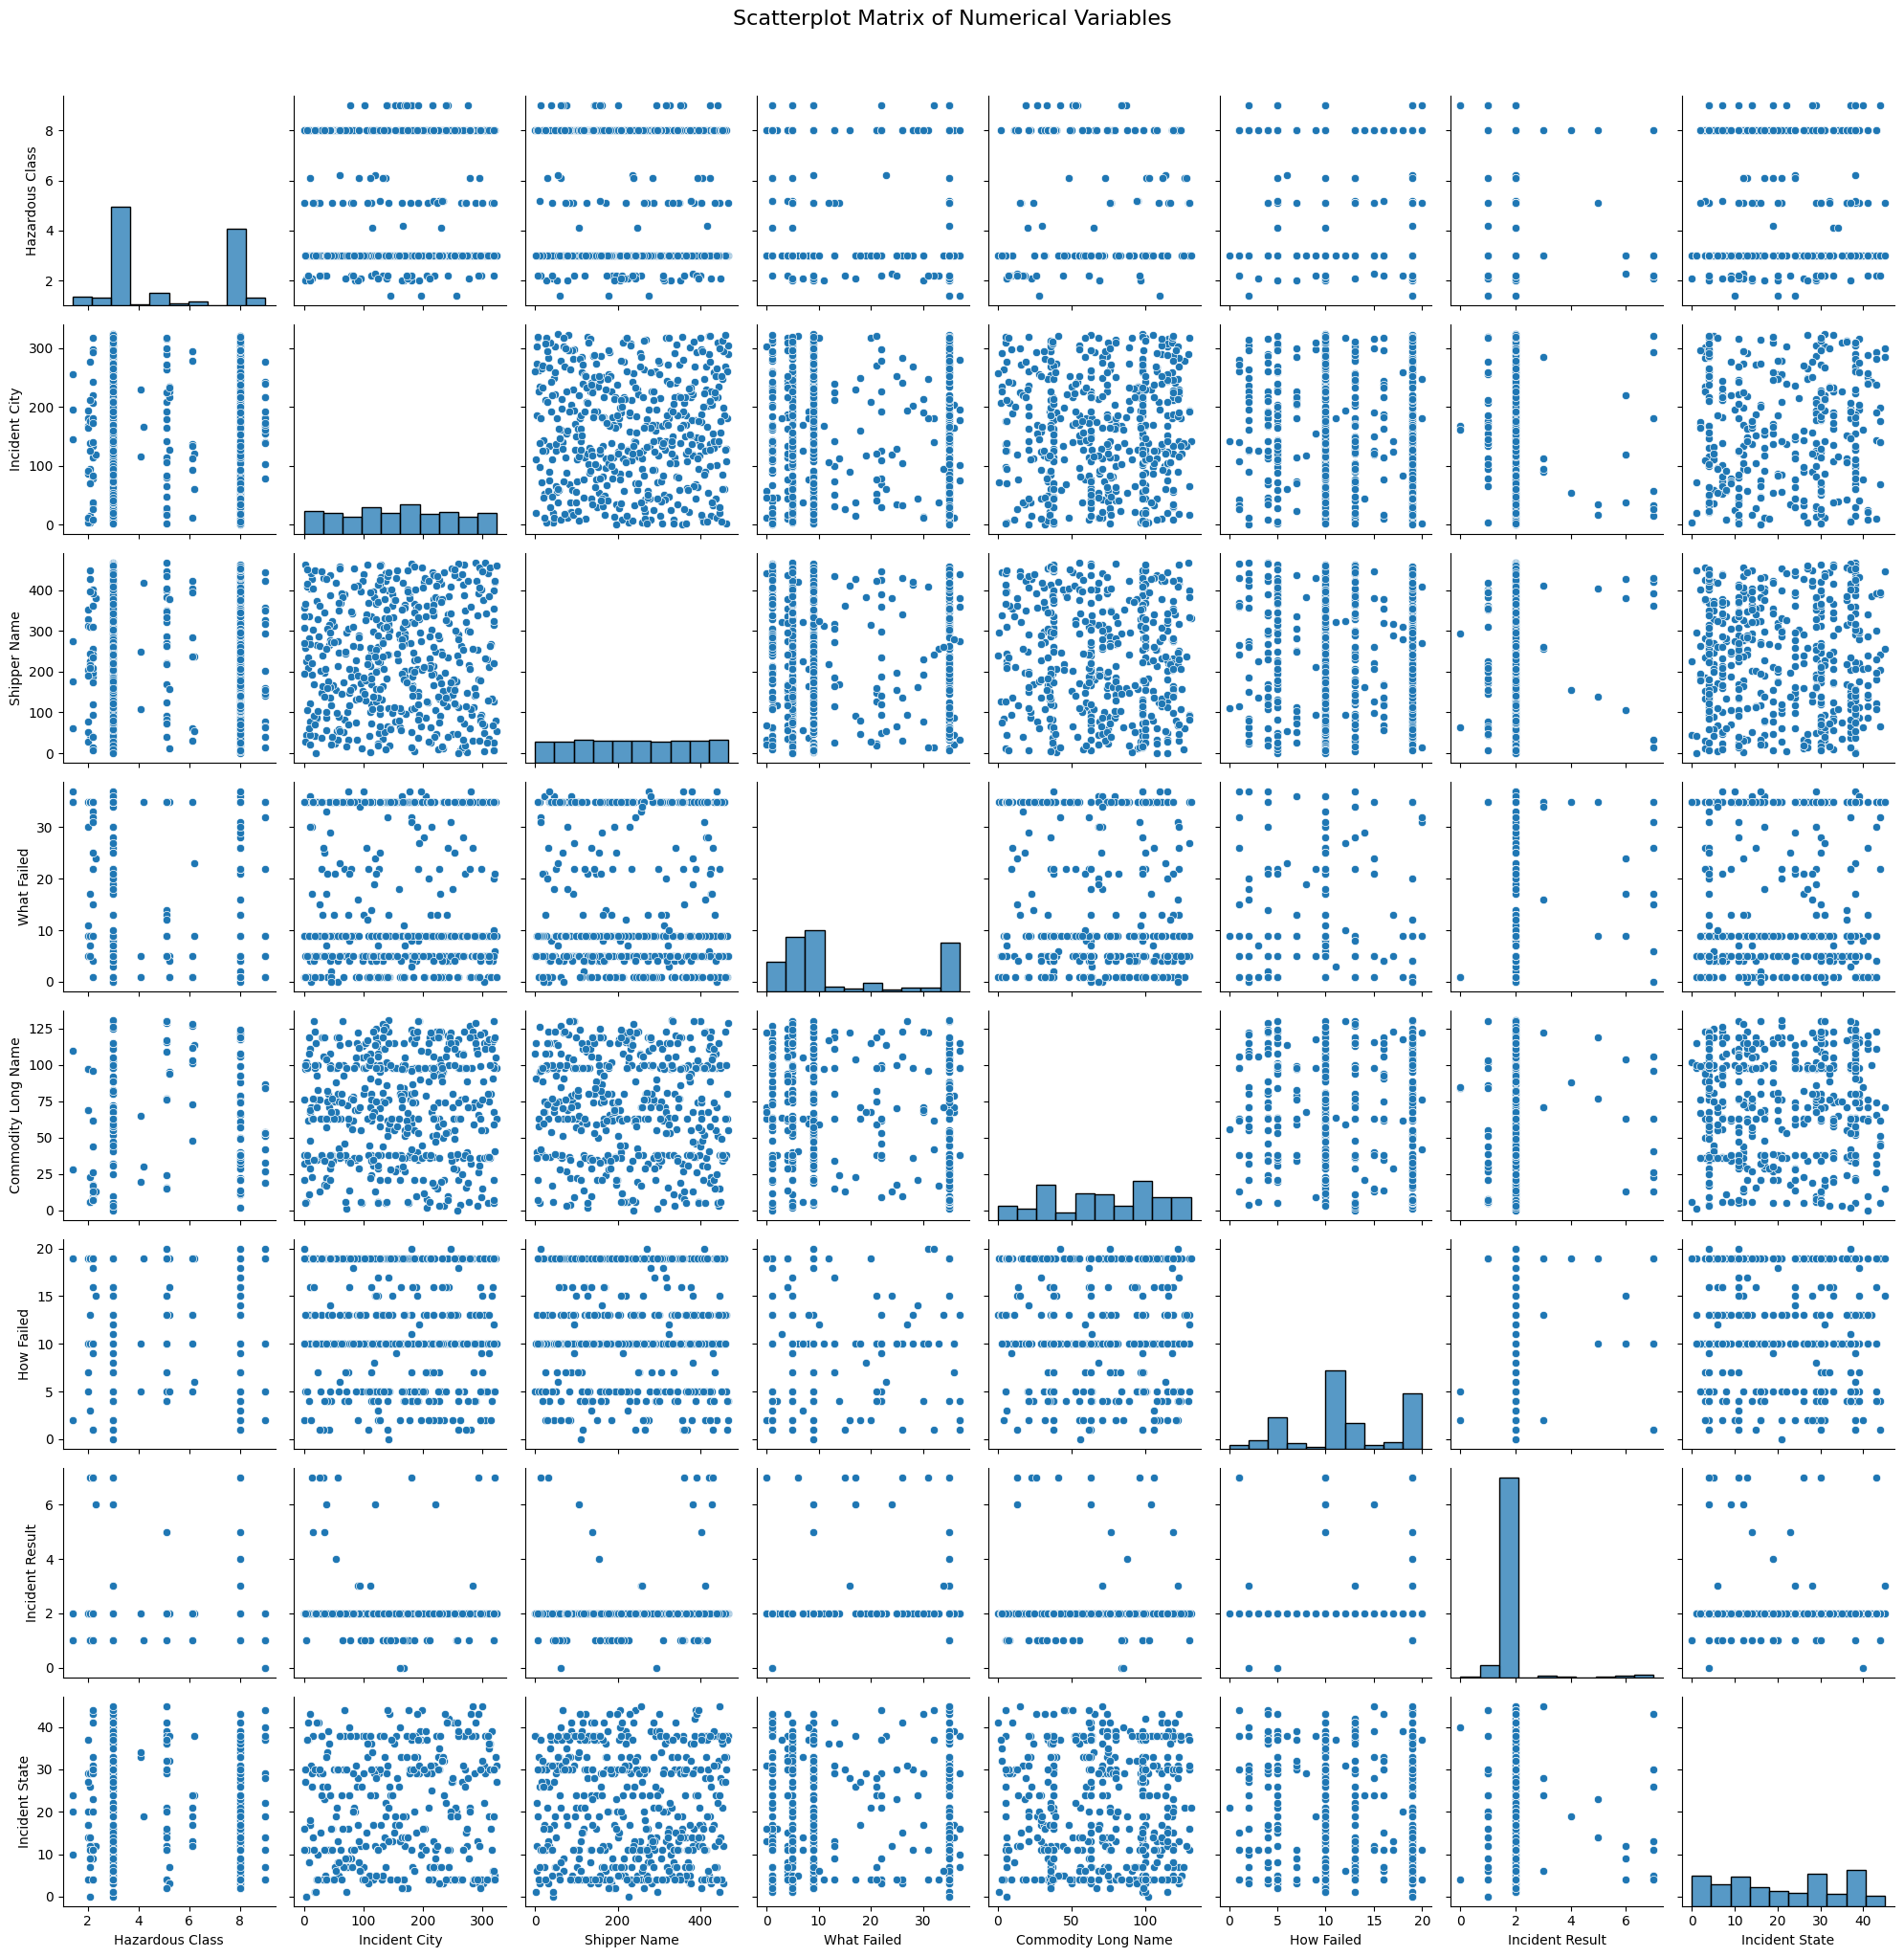

In [ ]:
# Selected features for correlation matrix
selected_features = ['Quantity Released', 'Total Damages', 'Hazardous Class',
                     'Cont1 Package Capacity', 'Incident City',
                     'Shipper Name', 'What Failed', 'Commodity Long Name', 'How Failed', 'Incident Result', 'Incident State']

# Reduce data for testing (optional)
#data = data.sample(n=500, random_state=42)

# Filter dataset to include selected features
X = data[selected_features]

# Define categorical features
cat_features = ['Incident City', 'Shipper Name', 'What Failed', 'Commodity Long Name', 'How Failed', 'Incident Result', 'Incident State']

# Encode categorical variables
label_encoders = {}
for col in cat_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].fillna('Unknown'))  # Handle missing values by filling with 'Unknown'
    label_encoders[col] = le

# Filter for numerical columns only
num_features = X.select_dtypes(include=['float64', 'int64']).columns
X_num = X[num_features]

# Create a pairplot for the numerical features
sns.pairplot(X_num)
plt.suptitle('Scatterplot Matrix of Numerical Variables', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

<ipython-input-93-2e0fbb8e7900>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_features] = num_imputer.fit_transform(X[num_features])
<ipython-input-93-2e0fbb8e7900>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cat_features] = cat_imputer.fit_transform(X[cat_features])


Missing values after imputation: Quantity Released          0
Total Hazmat Fatalities    0
Cont1 Package Capacity     0
Total Damages              0
Hazardous Class            0
dtype: int64


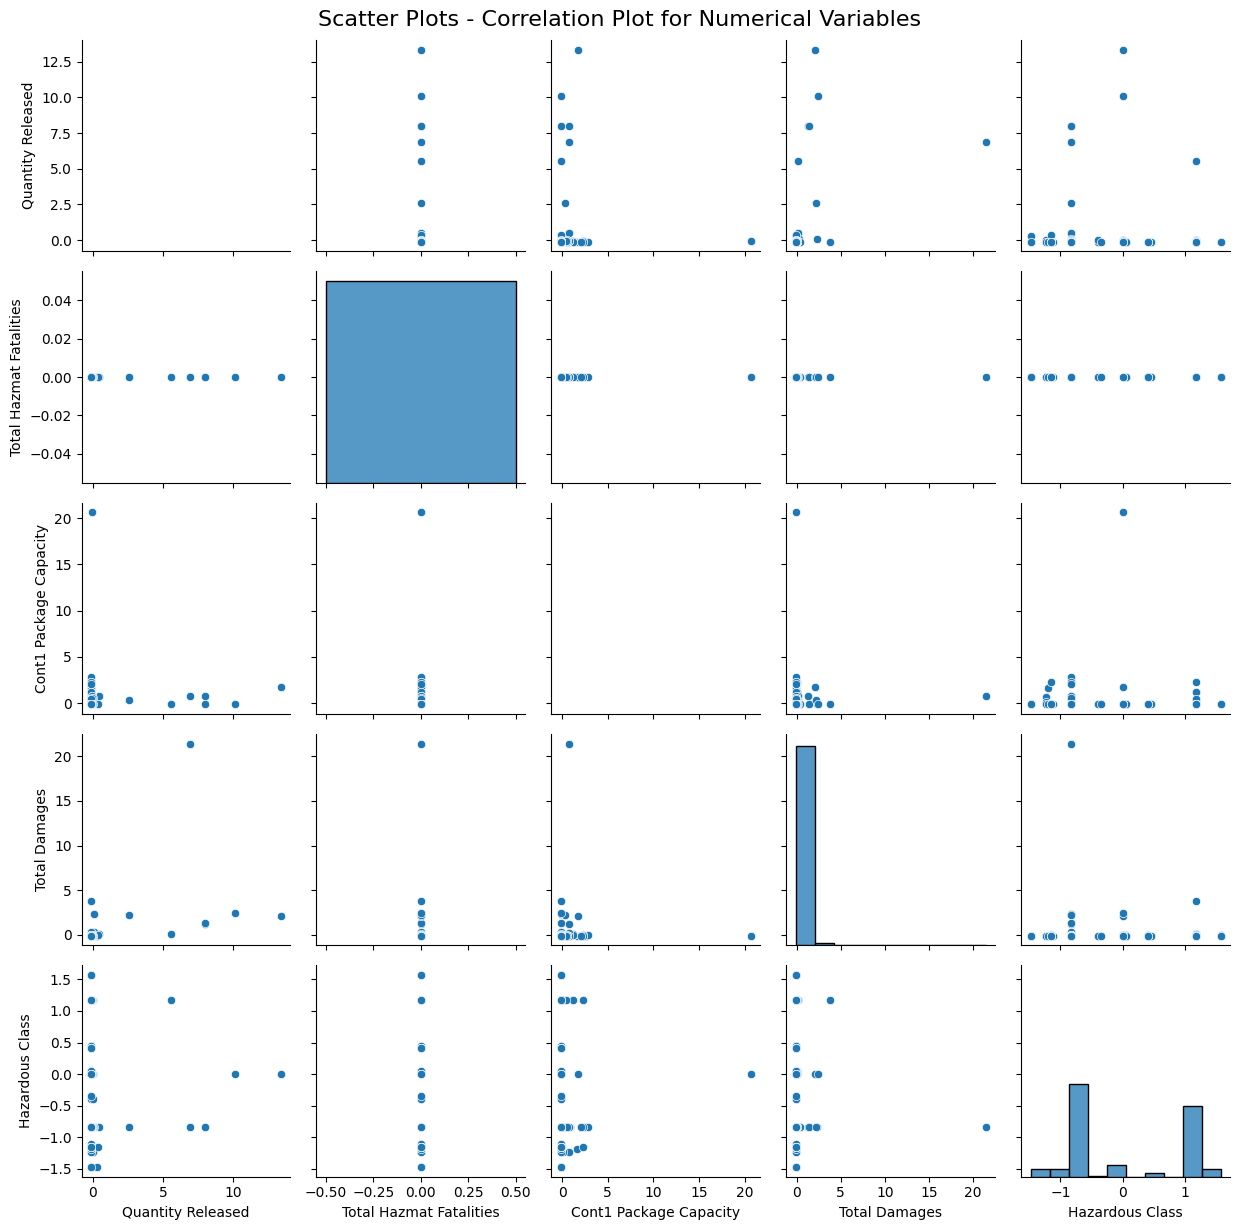

In [ ]:
# Selected features for PCA and correlation plot
selected_features = ['Quantity Released', 'Total Hazmat Fatalities',
                     'Cont1 Package Capacity','Total Damages', 'Hazardous Class']

# Filter dataset to include selected features
X = data[selected_features]

# Handle missing values
num_features = X.select_dtypes(include=['float64', 'int64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Create imputers for numerical and categorical columns
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values in numerical and categorical columns
X[num_features] = num_imputer.fit_transform(X[num_features])
X[cat_features] = cat_imputer.fit_transform(X[cat_features])

# Check for missing values again
print("Missing values after imputation:", X.isna().sum())

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DataFrame for the scaled data to make it easier to visualize
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Plot a scatterplot matrix (pairplot) for numerical variables
sns.pairplot(scaled_df, height=2.5)
plt.suptitle('Scatter Plots - Correlation Plot for Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

DIMENTIONALITY REDUCTION (PRINCIPAL COMPONENT ANALYSIS)

<ipython-input-5-598a40b34f3a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].fillna('Unknown'))  # Handle missing values by filling with 'Unknown'
<ipython-input-5-598a40b34f3a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].fillna('Unknown'))  # Handle missing values by filling with 'Unknown'
<ipython-input-5-598a40b34f3a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

Explained Variance Ratios for All Components: [0.24970928 0.23166302 0.12549431 0.12475161 0.12435498 0.07520191
 0.06818759 0.00063731]
Most influential variables for PC1:
Cont1 Package Capacity    0.705418
Quantity Released         0.705236
Total Damages             0.048125
What Failed               0.035873
Causes of Failure         0.030523
How Failed                0.021794
Incident City             0.004160
Shipper Name             -0.001021
Name: PC1, dtype: float64


Most influential variables for PC2:
How Failed                0.586638
Causes of Failure         0.577395
What Failed               0.563307
Total Damages             0.017812
Incident City            -0.031090
Shipper Name             -0.034864
Cont1 Package Capacity   -0.035113
Quantity Released        -0.037734
Name: PC2, dtype: float64


Most influential variables for PC3:
Shipper Name              0.710669
What Failed               0.028378
Quantity Released         0.016781
Cont1 Package Capacity    0.015661

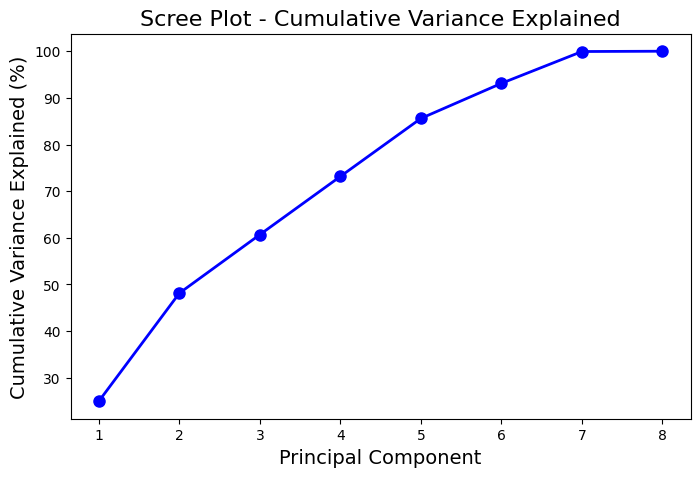

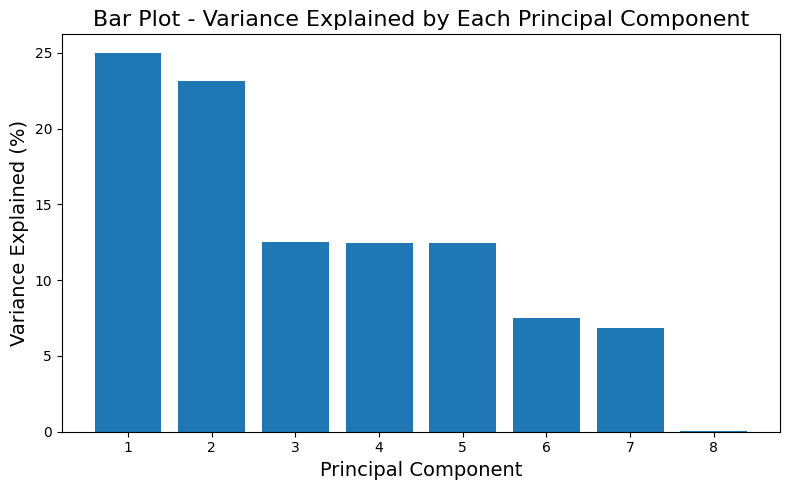

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import numpy as np



# Selected features for PCA
selected_features = ['Quantity Released', 'Total Damages',
                     'Cont1 Package Capacity', 'Incident City',
                     'Shipper Name', 'What Failed', 'Causes of Failure', 'How Failed']

# Filter dataset to include selected features
X = data[selected_features]

# Define categorical features
cat_features = ['Incident City', 'Shipper Name', 'What Failed', 'Causes of Failure', 'How Failed']

# Encode categorical variables
label_encoders = {}
for col in cat_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].fillna('Unknown'))  # Handle missing values by filling with 'Unknown'
    label_encoders[col] = le

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA with the number of components equal to the number of features
pca = PCA(n_components=X_scaled.shape[1])  # This sets the number of components equal to the number of features
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio for the selected components
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios for All Components:", explained_variance)

# Identify the most influential variable for each principal component
# Get the loadings (coefficients of the original variables for each component)
loadings = pca.components_

# Create a DataFrame to display the loadings with their corresponding feature names
loading_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=X.columns)

# Show the most influential variables for each component (highest absolute loading value)
for pc in loading_df.columns:
    print(f"Most influential variables for {pc}:")
    print(loading_df[pc].sort_values(ascending=False))
    print("\n")

# Cumulative variance explained by the components
cumulative_variance = np.cumsum(explained_variance)

# Scree Plot for Cumulative Variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance * 100, 'bo-', linewidth=2, markersize=8)
plt.title('Scree Plot - Cumulative Variance Explained', fontsize=16)
plt.xlabel('Principal Component', fontsize=14)
plt.ylabel('Cumulative Variance Explained (%)', fontsize=14)
plt.xticks(range(1, len(cumulative_variance) + 1))




# Bar Plot for Individual Variance Explained by Each Component
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100)
plt.title('Bar Plot - Variance Explained by Each Principal Component', fontsize=16)
plt.xlabel('Principal Component', fontsize=14)
plt.ylabel('Variance Explained (%)', fontsize=14)
plt.xticks(range(1, len(explained_variance) + 1))


plt.tight_layout()
plt.show()

MACHINE LEARNING

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer


# Sample 10,000 observations randomly
data = data.sample(n=10000, random_state=42)


# Identify and handle missing values
for col in data.columns:
    if data[col].dtype == "object":  # Categorical columns
        data[col] = data[col].fillna(data[col].mode()[0])
    else:  # Numeric columns
        data[col] = data[col].fillna(data[col].mean())


# Select relevant features and target variable
features = [
    'Quantity Released', 'Cont1 Package Capacity', 'Incident City',
    'Total Damages', 'Shipper Name', 'Mode Of Transportation',
    'How Failed', 'Incident Result', 'Causes of Failure'
]
target = 'What Failed'

# Split into features and target variable
X = data[features]
y = data[target]

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Classification Report:
                                                                                                              precision    recall  f1-score   support

                                                                                                   Air Inlet       0.00      0.00      0.00         2
                                                                                             Auxiliary Valve       0.00      0.00      0.00         1
                               Auxiliary Valve; Bottom Outlet Valve; Bottom Outlet Valve; Piping or Fittings       0.00      0.00      0.00         1
                 Auxiliary Valve; Bottom Outlet Valve; Closure (e.g., Cap, Top, or Plug); Piping or Fittings       0.00      0.00      0.00         1
                                                    Auxiliary Valve; Bottom Outlet Valve; Piping or Fittings       0.00      0.00      0.00         4
                Auxiliary Valve; Closure (e.g., Cap, Top, or Plug); Manway o

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Classification Report:
                                                                                             precision    recall  f1-score   support

                                                                                  Air Inlet       0.00      0.00      0.00         1
                                                                            Auxiliary Valve       0.00      0.00      0.00         4
                                        Auxiliary Valve; Basic Material; Piping or Fittings       0.00      0.00      0.00         2
Auxiliary Valve; Bottom Outlet Valve; Closure (e.g., Cap, Top, or Plug); Piping or Fittings       0.00      0.00      0.00         1
                                   Auxiliary Valve; Bottom Outlet Valve; Piping or Fittings       0.00      0.00      0.00         6
                      Auxiliary Valve; Hose; Loading or Unloading Lines; P

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


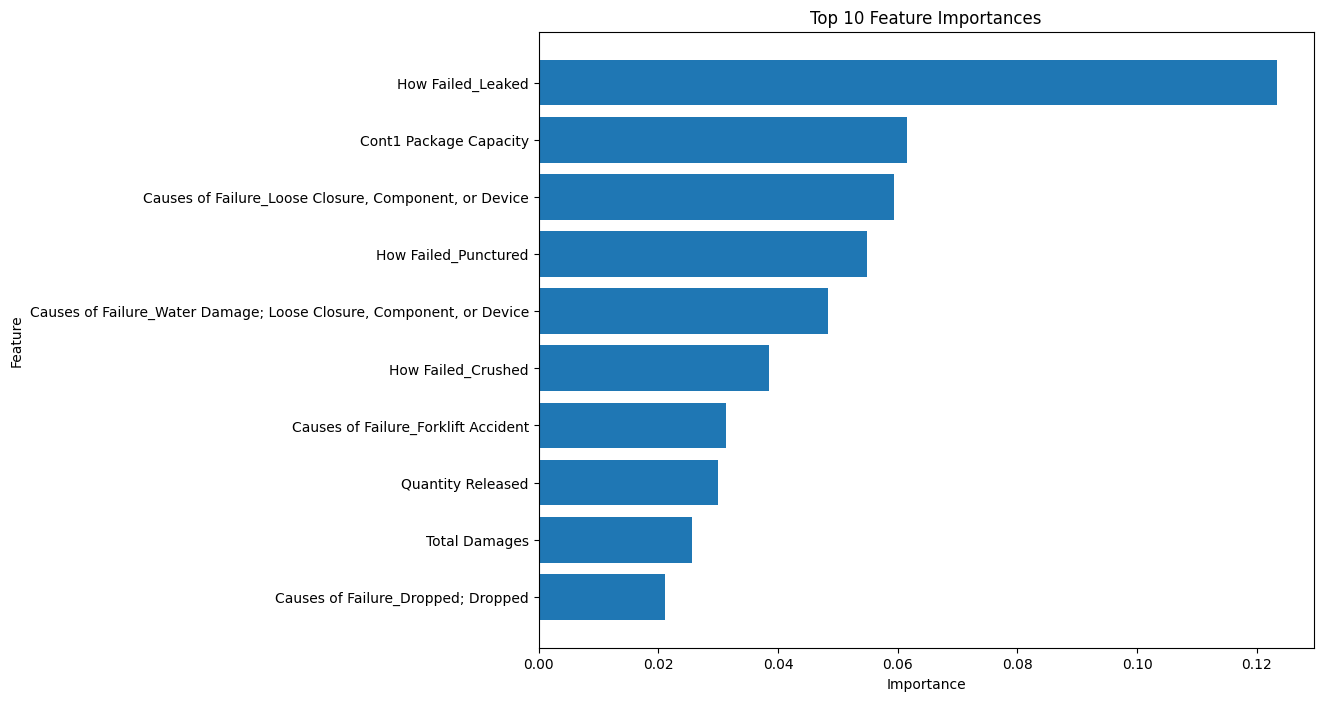

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Sample 10,000 observations randomly
data = data.sample(n=10000, random_state=42)

# Identify and handle missing values
for col in data.columns:
    if data[col].dtype == "object":  # Categorical columns
        data[col] = data[col].fillna(data[col].mode()[0])
    else:  # Numeric columns
        data[col] = data[col].fillna(data[col].mean())

# Select relevant features and target variable
features = [
    'Quantity Released', 'Cont1 Package Capacity', 'Incident City',
    'Total Damages', 'Shipper Name', 'Mode Of Transportation',
    'How Failed', 'Incident Result', 'Causes of Failure'
]
target = 'What Failed'

# Split into features and target variable
X = data[features]
y = data[target]

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Use the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Train the model
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Plot feature importance
feature_importances = best_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_indices[:10])), feature_importances[sorted_indices[:10]], align='center')
plt.yticks(range(len(sorted_indices[:10])), [X.columns[i] for i in sorted_indices[:10]])
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

                                                                                                              precision    recall  f1-score   support

                                                                                                   Air Inlet       0.00      0.00      0.00         2
                                                                                             Auxiliary Valve       0.00      0.00      0.00         2
                                                         Auxiliary Valve; Basic Material; Piping or Fittings       0.00      0.00      0.00         0
                               Auxiliary Valve; Bottom Outlet Valve; Bottom Outlet Valve; Piping or Fittings       0.00      0.00      0.00         1
                 Auxiliary Valve; Bottom Outlet Valve; Closure (e.g., Cap, Top, or Plug); Piping or Fittings       0.00      0.00      0.00         1
                                                    Auxiliary Valve; Bottom Outlet Valve; Piping or

<ipython-input-20-0795d3c659a1>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_features.values, y=top_10_features.index, palette='viridis')


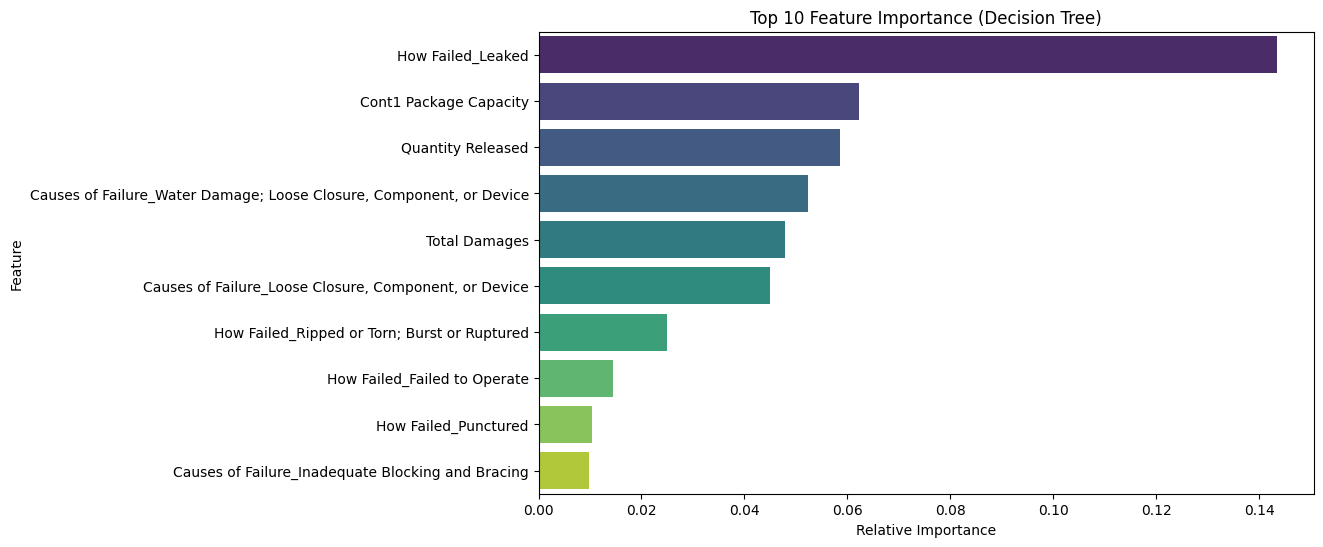

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Sample 10,000 observations randomly
data = data.sample(n=10000, random_state=42)

# Handle missing values manually: Mode for categorical, Mean for numeric
for col in data.columns:
    if data[col].dtype == "object":  # Categorical columns
        data[col] = data[col].fillna(data[col].mode()[0])
    else:  # Numeric columns
        data[col] = data[col].fillna(data[col].mean())

# Select relevant features and target variable
features = [
    'Quantity Released', 'Cont1 Package Capacity', 'Incident City',
    'Total Damages', 'Shipper Name', 'Mode Of Transportation',
    'How Failed', 'Incident Result', 'Causes of Failure'
]
target = 'What Failed'

# Split into features and target variable
X = data[features]
y = data[target]

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

# Plot top 10 feature importances
feature_importances = model.feature_importances_
features_sorted = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)

# Plot only the top 10 most important features
top_10_features = features_sorted.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features.values, y=top_10_features.index, palette='viridis')
plt.title('Top 10 Feature Importance (Decision Tree)')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
pip install xgboost